In [172]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [173]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

In [174]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
sns.set_style('white')
sns.set_context('poster')

In [176]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MIT0604', 'MIT9312', 'MED4', 'Natl2A', 'MIT9313']
ppallete = ['#f79934', '#face6e', '#62A586', '#7A9BC8', '#F47681', ]
# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']
#  604 #FCC479
#     #ffd7a1
#     #fcb14c
#     MED4 = #62A586
#     9313 #F47681
#     natl #7A9BC8

In [316]:
MIT0604_color = '#f79934'
MIT9312_color = '#face6e'
MED4_color = '#62A586'
Natl2A_color = '#7A9BC8'
MIT9313_color = '#F47681'
SYN_color = '#6cf0ba'
syn_0606_color = '#d13f75'
syn_natl_color = '#eeb7cb'
syn_natl_0604_color = '#b9d2d8'
other_color = 'lightgrey'
syn_natl_color = '#4ec4cf' #'#54a4ba' # '#6cf0e1'
syn_0606_color = '#dffc03' #'#8df06c'
natl_0604_color = '#70d156' #'#2e6e54'
syn_natl_0604_color = '#2e6e54'
SYN_color = '#6cf0ba'


color_dict = {
'MIT0604' : '#f79934',
'9312' : '#face6e',
'MED4' : '#62A586',
'NATL2A' :  '#7A9BC8',
'9313' : '#F47681',
'Syn WH8102' : '#6cf0ba',
}

In [177]:
os.listdir('6x6')

['6x6_setup.csv', 'fl_exp1.csv', 'fl_exp2.csv', 'fl_exp3.csv']

In [178]:
setup_columns = ['Sample', 'MED4', '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102',
       'Total tubes', 'how many in 1 tube ?']
use_setup_columns = ['Sample', 'MED4', '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102']

setup_df = pd.read_csv(os.path.join('6x6', '6x6_setup.csv'), names=setup_columns, usecols=use_setup_columns)

In [179]:
setup_df.dropna(axis=0, subset=['Sample'], inplace=True)

In [180]:
for c in setup_df.columns:
    setup_df[c] = pd.to_numeric(setup_df[c], downcast='integer')

In [181]:
setup_df.head()

Sample  MED4  9313  9312  NATL2A  MIT0604  Syn WH8102
2       1   1.0   NaN   NaN     NaN      NaN         NaN
3       2   NaN   2.0   NaN     NaN      NaN         NaN
4       3   NaN   NaN   3.0     NaN      NaN         NaN
5       4   NaN   NaN   NaN     4.0      NaN         NaN
6       5   NaN   NaN   NaN     NaN      5.0         NaN

In [211]:
exp1_df = pd.read_csv(os.path.join('6x6', 'fl_exp1.csv'))
exp2_df = pd.read_csv(os.path.join('6x6', 'fl_exp2.csv'))

In [212]:
exp1_df = pd.melt(exp1_df, id_vars=['Date', 'Day'], value_name='FL', var_name='Sample')
exp2_df = pd.melt(exp2_df, id_vars=['Date', 'Day'], value_name='FL', var_name='Sample')

In [213]:
exp1_df.head()

Date       Day Sample     FL
0  6/20/2019 12:19  0.000000     1A  0.172
1  6/21/2019 16:03  1.155556     1A  0.250
2  6/23/2019 13:56  3.067361     1A  0.482
3  6/24/2019 12:22  4.002083     1A  0.703
4   6/25/2019 9:00  4.861806     1A  0.781

In [214]:
exp2_df.head()

Date       Day Sample     FL
0  7/29/2019 14:54  0.000000     1A  0.009
1  7/31/2019 14:54  2.000000     1A  0.019
2   8/1/2019 12:28  2.898611     1A -0.019
3   8/4/2019 16:32  6.068056     1A  0.028
4   8/6/2019 13:10  7.927778     1A  0.009

In [215]:
exp1_df['sample_prefix'] = pd.to_numeric(exp1_df.Sample.str.rstrip('[ABCDEFGH]'))
exp2_df['sample_prefix'] = pd.to_numeric(exp2_df.Sample.str.rstrip('[ABCDEFGH]'))

In [216]:
exp1_df['experiment'] = 'e1'
exp2_df['experiment'] = 'e2'

In [217]:
setup_df.index = setup_df.Sample

In [218]:
tmp_df = setup_df.drop(columns=['Sample']).notna()

In [219]:
tmp_df['num_of_species'] = tmp_df.sum(axis=1)

In [220]:
tmp_df['ssp'] = pd.melt(setup_df, id_vars=['Sample']).dropna().groupby('Sample')['variable'].unique().str.join(',')

In [221]:
exp1_df = pd.merge(exp1_df, tmp_df, how='left', left_on='sample_prefix', right_index=True)
exp2_df = pd.merge(exp2_df, tmp_df, how='left', left_on='sample_prefix', right_index=True)

In [222]:
exp1_df.loc[exp1_df['FL']< 0.05,'FL'] = 0.05
exp2_df.loc[exp2_df['FL']< 0.05,'FL'] = 0.05

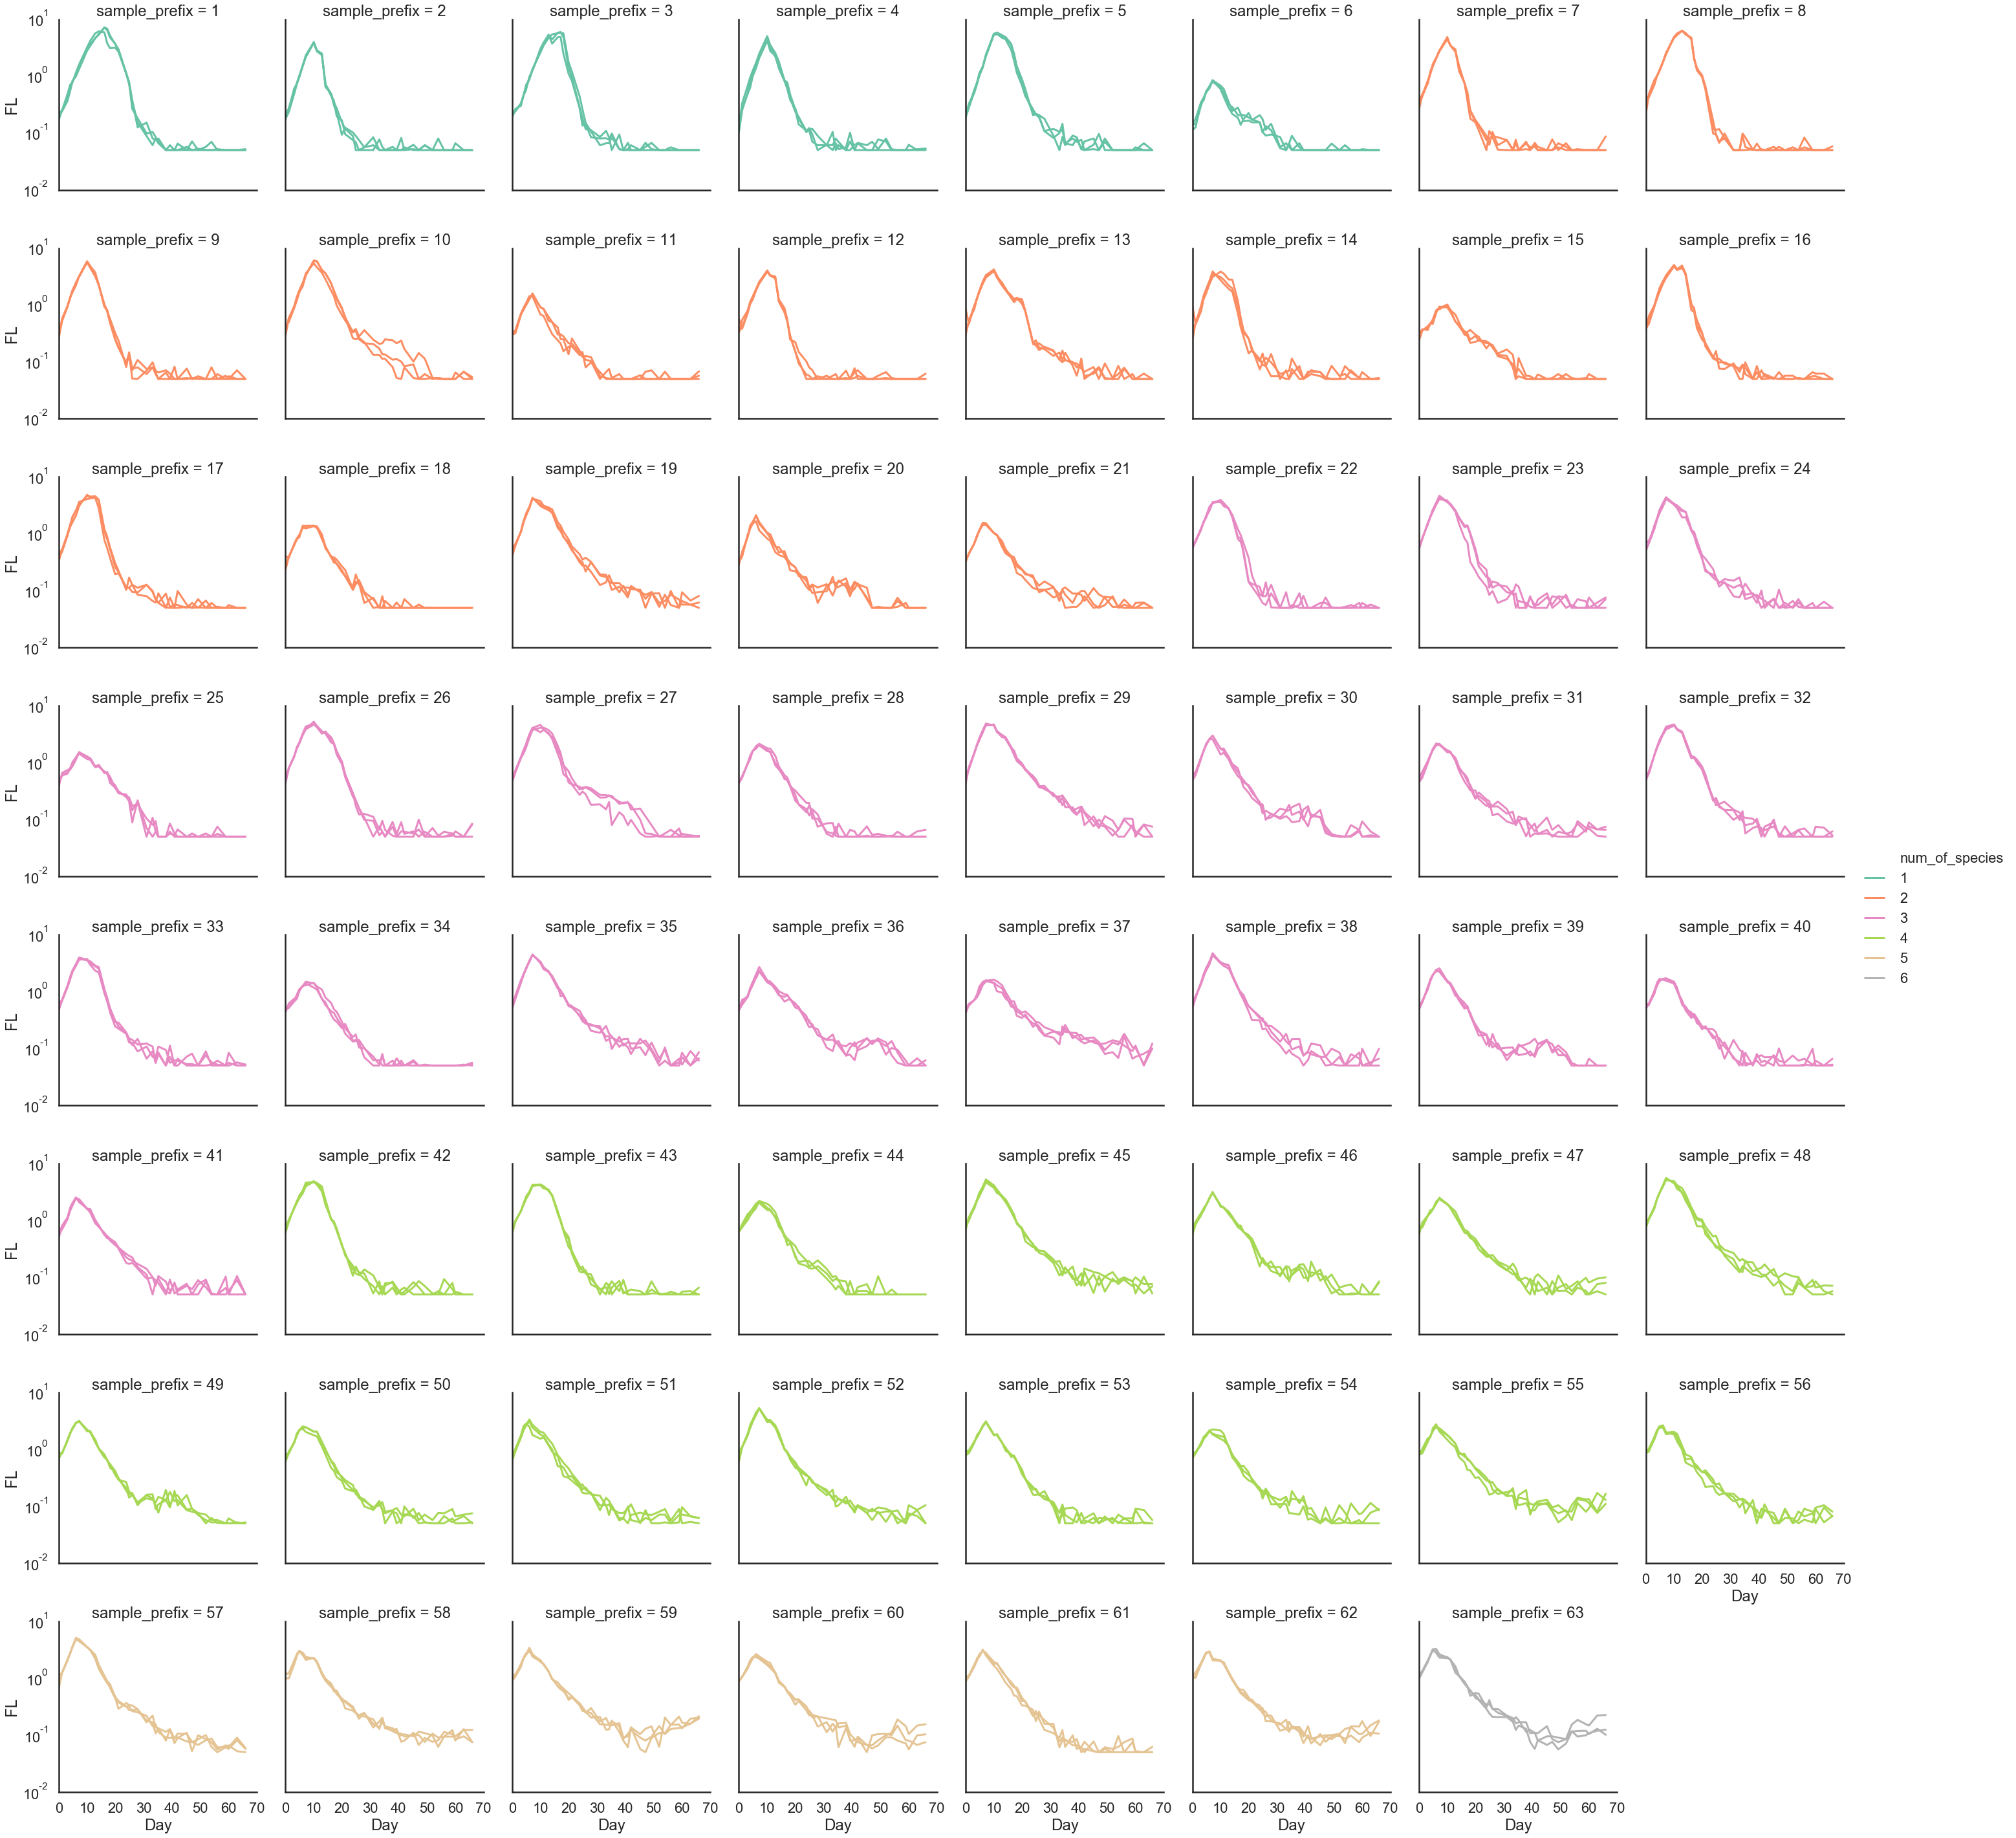

In [292]:
g = sns.relplot(data=exp1_df, x='Day', y='FL', col='sample_prefix', col_wrap=8, kind='line', #ci='sd',
                            estimator=None, units='Sample',

                hue='num_of_species', palette='Set2', legend='full')
g.set(yscale='log')

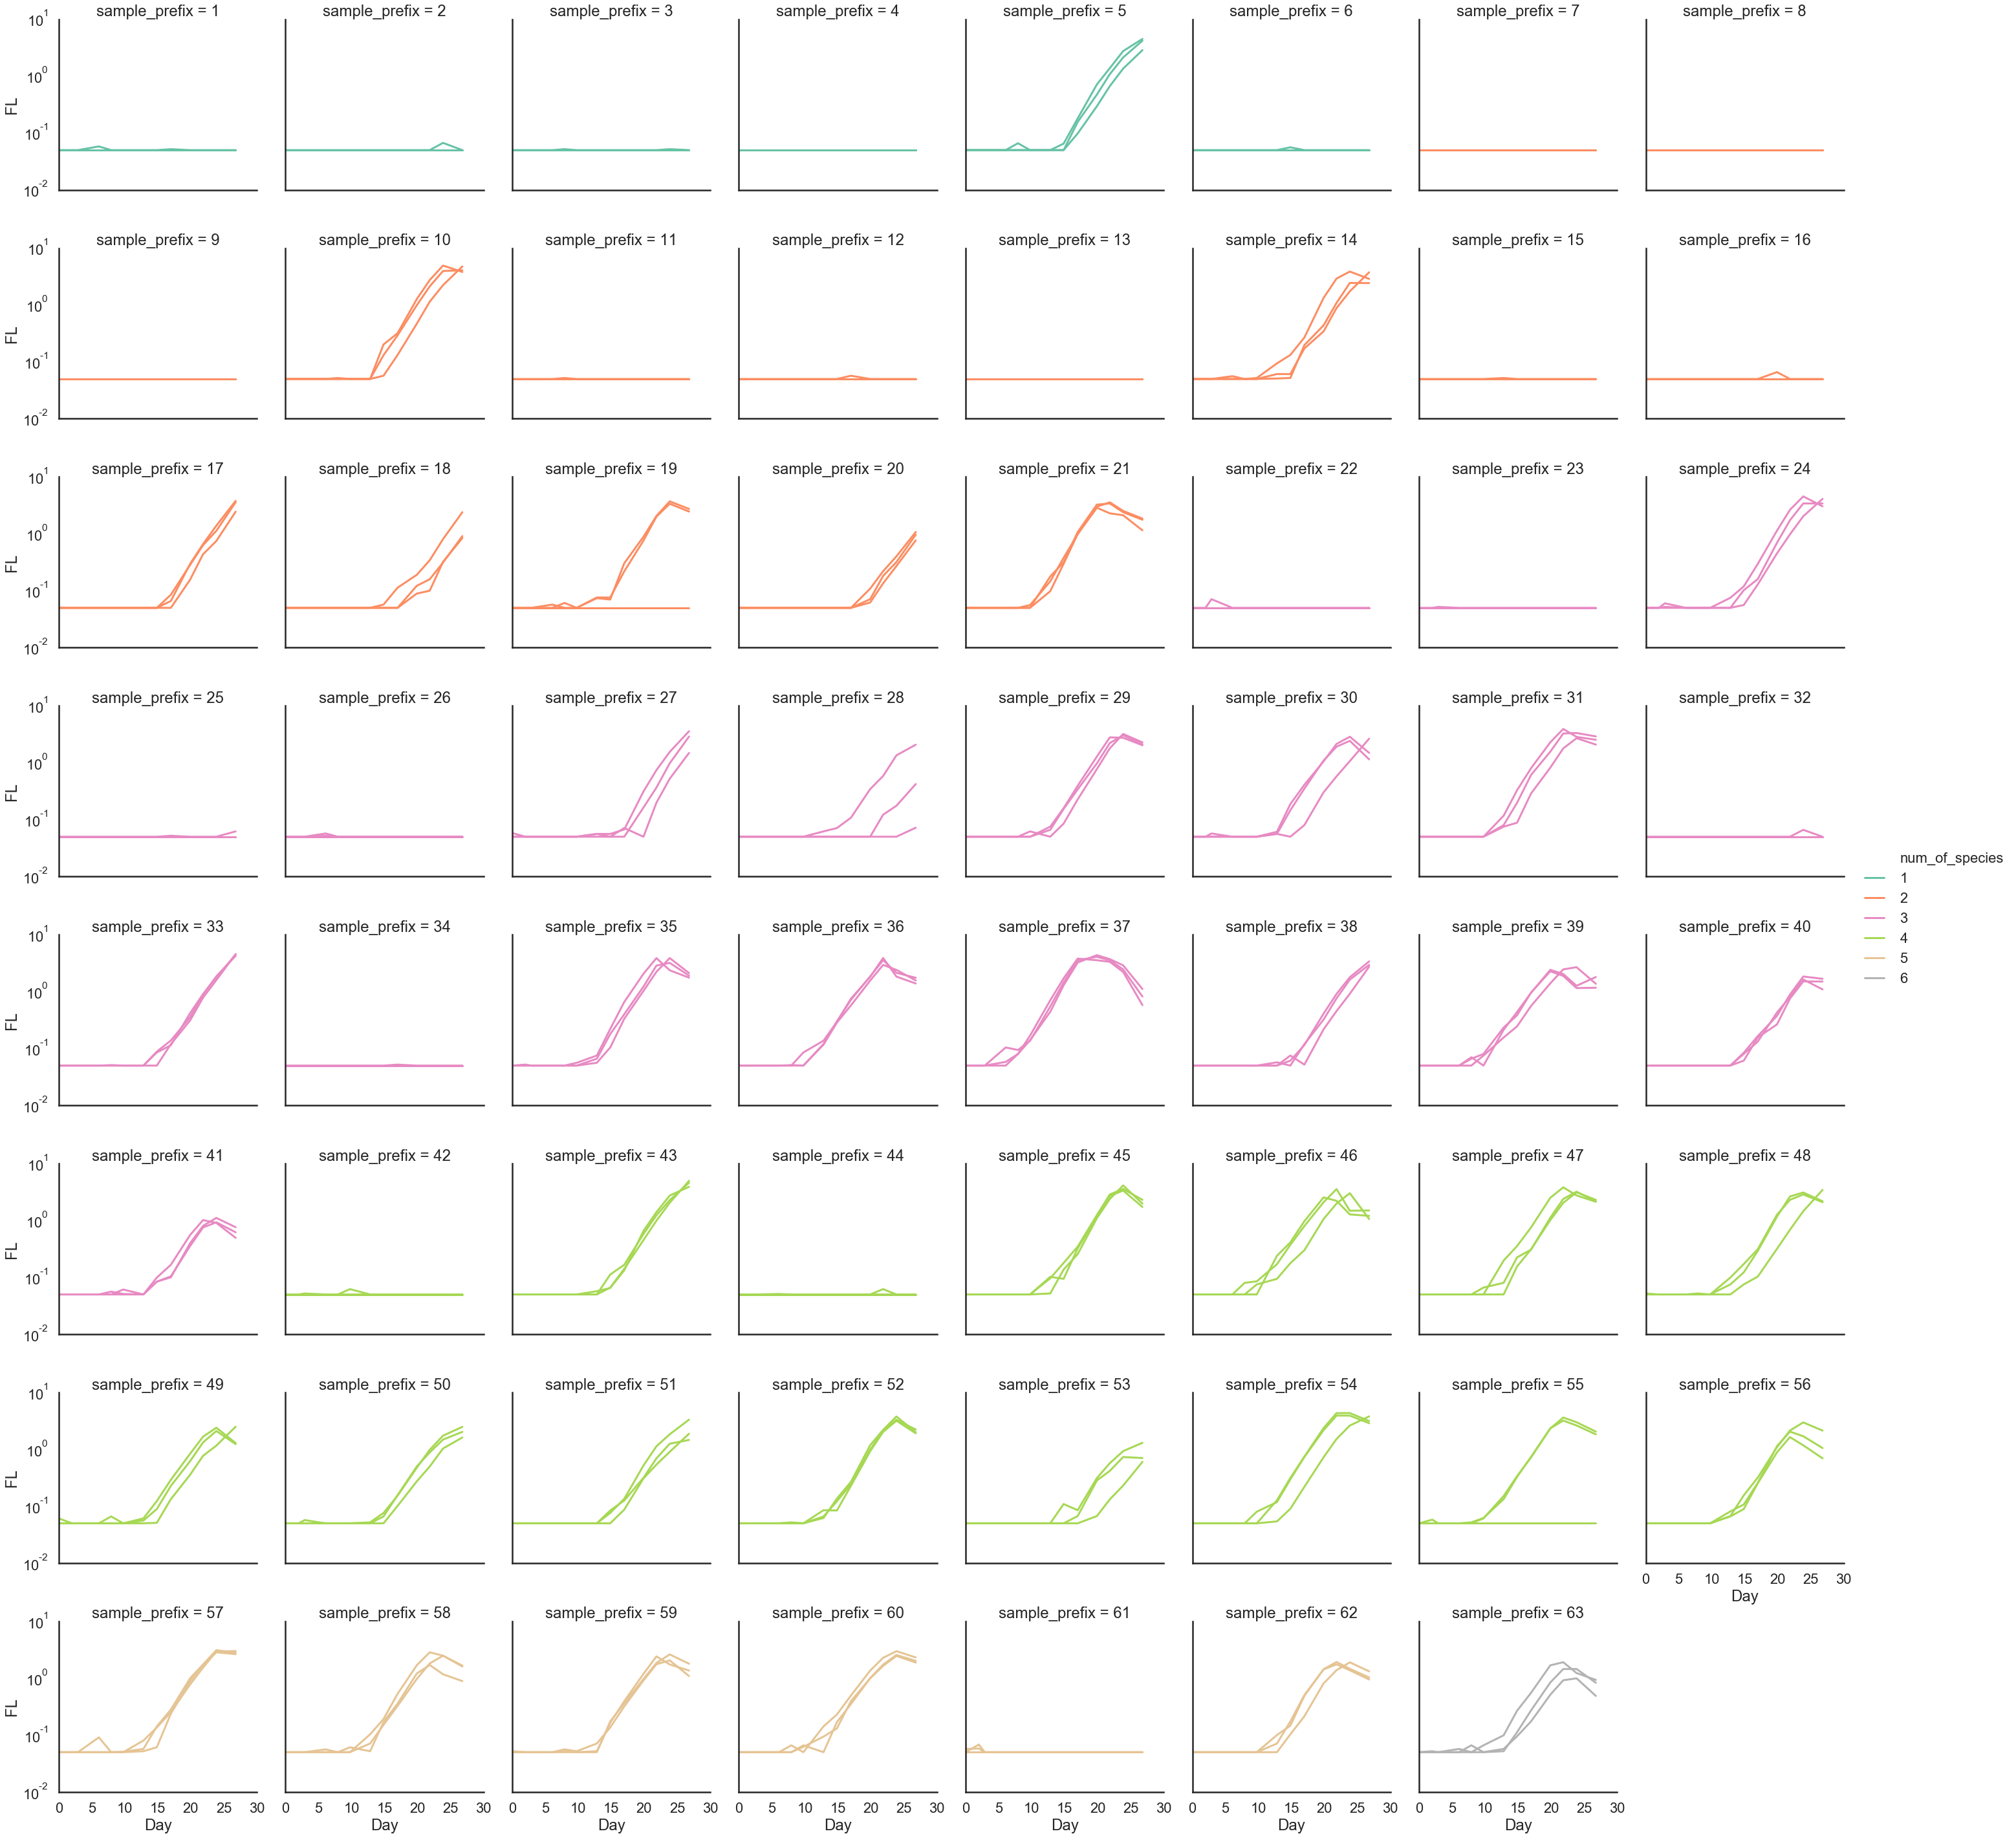

In [293]:
g = sns.relplot(data=exp2_df, x='Day', y='FL', col='sample_prefix', col_wrap=8, kind='line', #ci='sd', 
                            estimator=None, units='Sample',

                hue='num_of_species', palette='Set2', legend='full')
g.set(yscale='log')

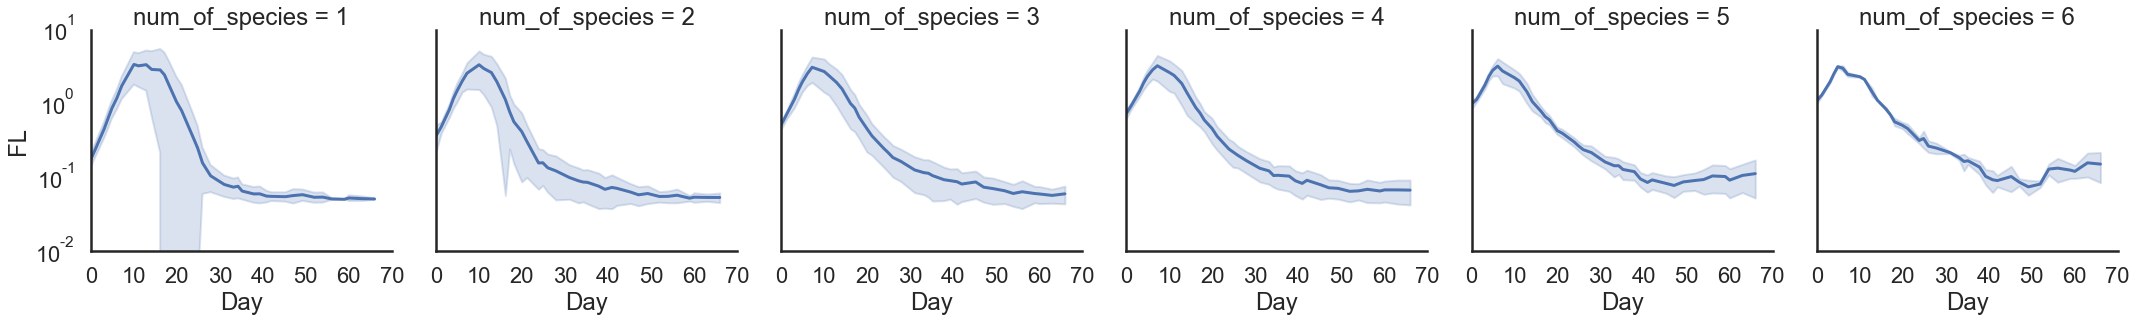

In [105]:
g = sns.relplot(data=exp1_df, x='Day', y='FL', col='num_of_species', kind='line', ci='sd')
g.set(yscale='log')

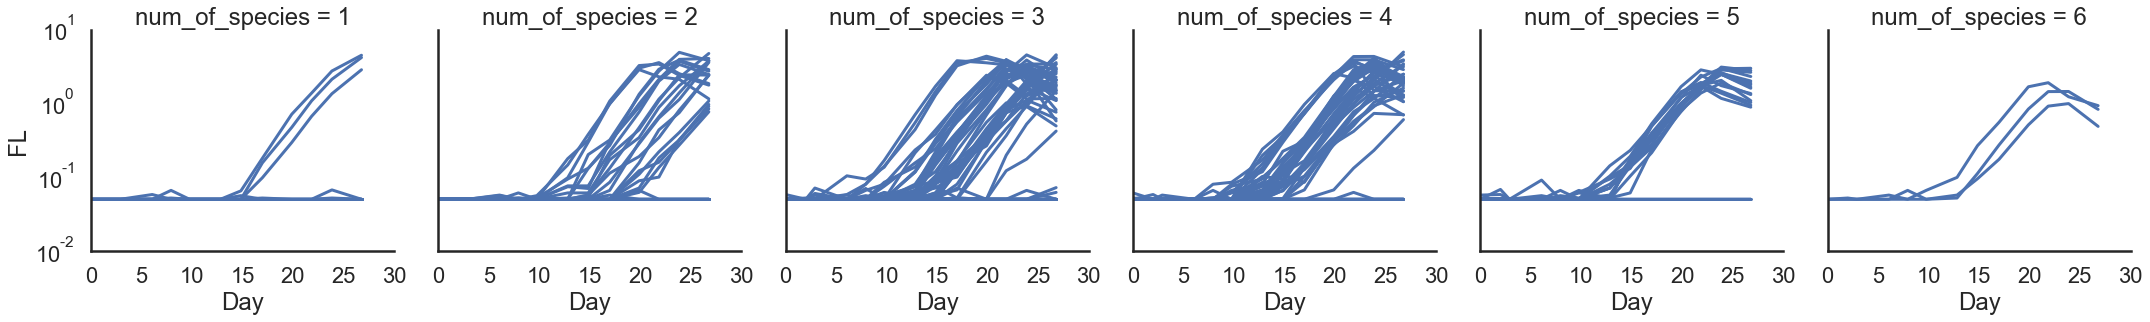

In [106]:
g = sns.relplot(data=exp2_df, x='Day', y='FL', col='num_of_species', kind='line', 
               # ci='sd'
            estimator=None, units='Sample',
                
               )
g.set(yscale='log')

In [107]:
tmp_df.columns


Index(['MED4', '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102',
       'num_of_species'],
      dtype='object')

In [108]:
exp1_df.columns

Index(['Date', 'Day', 'Sample', 'FL', 'sample_prefix', 'experiment', 'MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species'],
      dtype='object')

In [109]:
exp1_dfm = pd.melt(exp1_df, id_vars=['Date', 'Day', 'Sample', 'FL', 'sample_prefix', 'experiment', 'num_of_species'],
       var_name='sp')
exp2_dfm = pd.melt(exp2_df, id_vars=['Date', 'Day', 'Sample', 'FL', 'sample_prefix', 'experiment', 'num_of_species'],
       var_name='sp')

In [110]:
exp1_dfm = exp1_dfm.loc[exp1_dfm['value']]
exp2_dfm = exp2_dfm.loc[exp2_dfm['value']]
exp1_dfm.drop(columns=['value'], inplace=True)
exp2_dfm.drop(columns=['value'], inplace=True)

In [111]:
exp1_dfm.head()

Date       Day Sample     FL  sample_prefix experiment  \
0  6/20/2019 12:19  0.000000     1A  0.172              1         e1   
1  6/21/2019 16:03  1.155556     1A  0.250              1         e1   
2  6/23/2019 13:56  3.067361     1A  0.482              1         e1   
3  6/24/2019 12:22  4.002083     1A  0.703              1         e1   
4   6/25/2019 9:00  4.861806     1A  0.781              1         e1   

   num_of_species species  
0               1    MED4  
1               1    MED4  
2               1    MED4  
3               1    MED4  
4               1    MED4

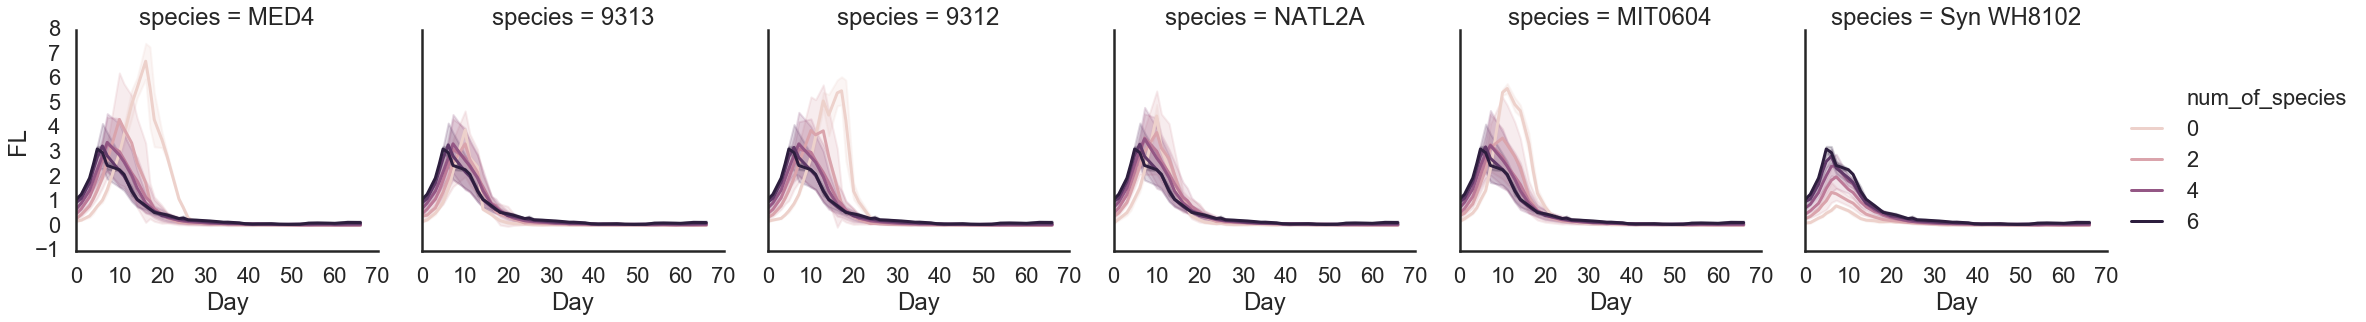

In [112]:
sns.relplot(data=exp1_dfm, x='Day', y='FL', kind='line', ci='sd',
            col='sp',
                hue='num_of_species'
               )

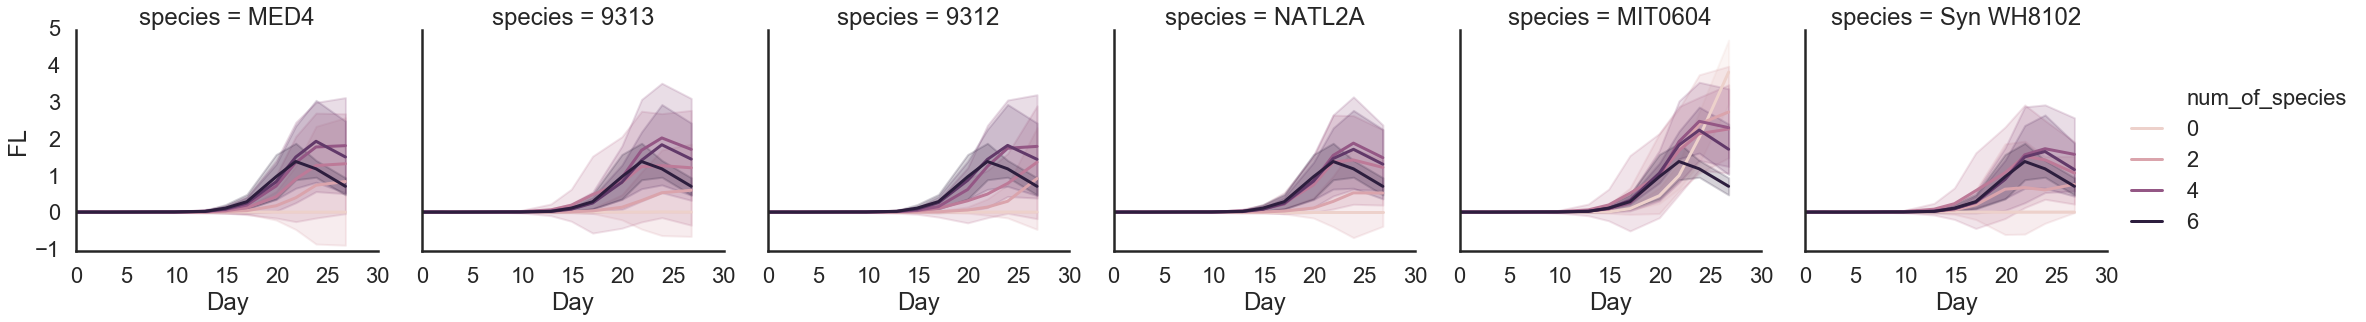

In [113]:
sns.relplot(data=exp2_dfm, x='Day', y='FL', kind='line', ci='sd',
            col='sp',
                hue='num_of_species'
               )

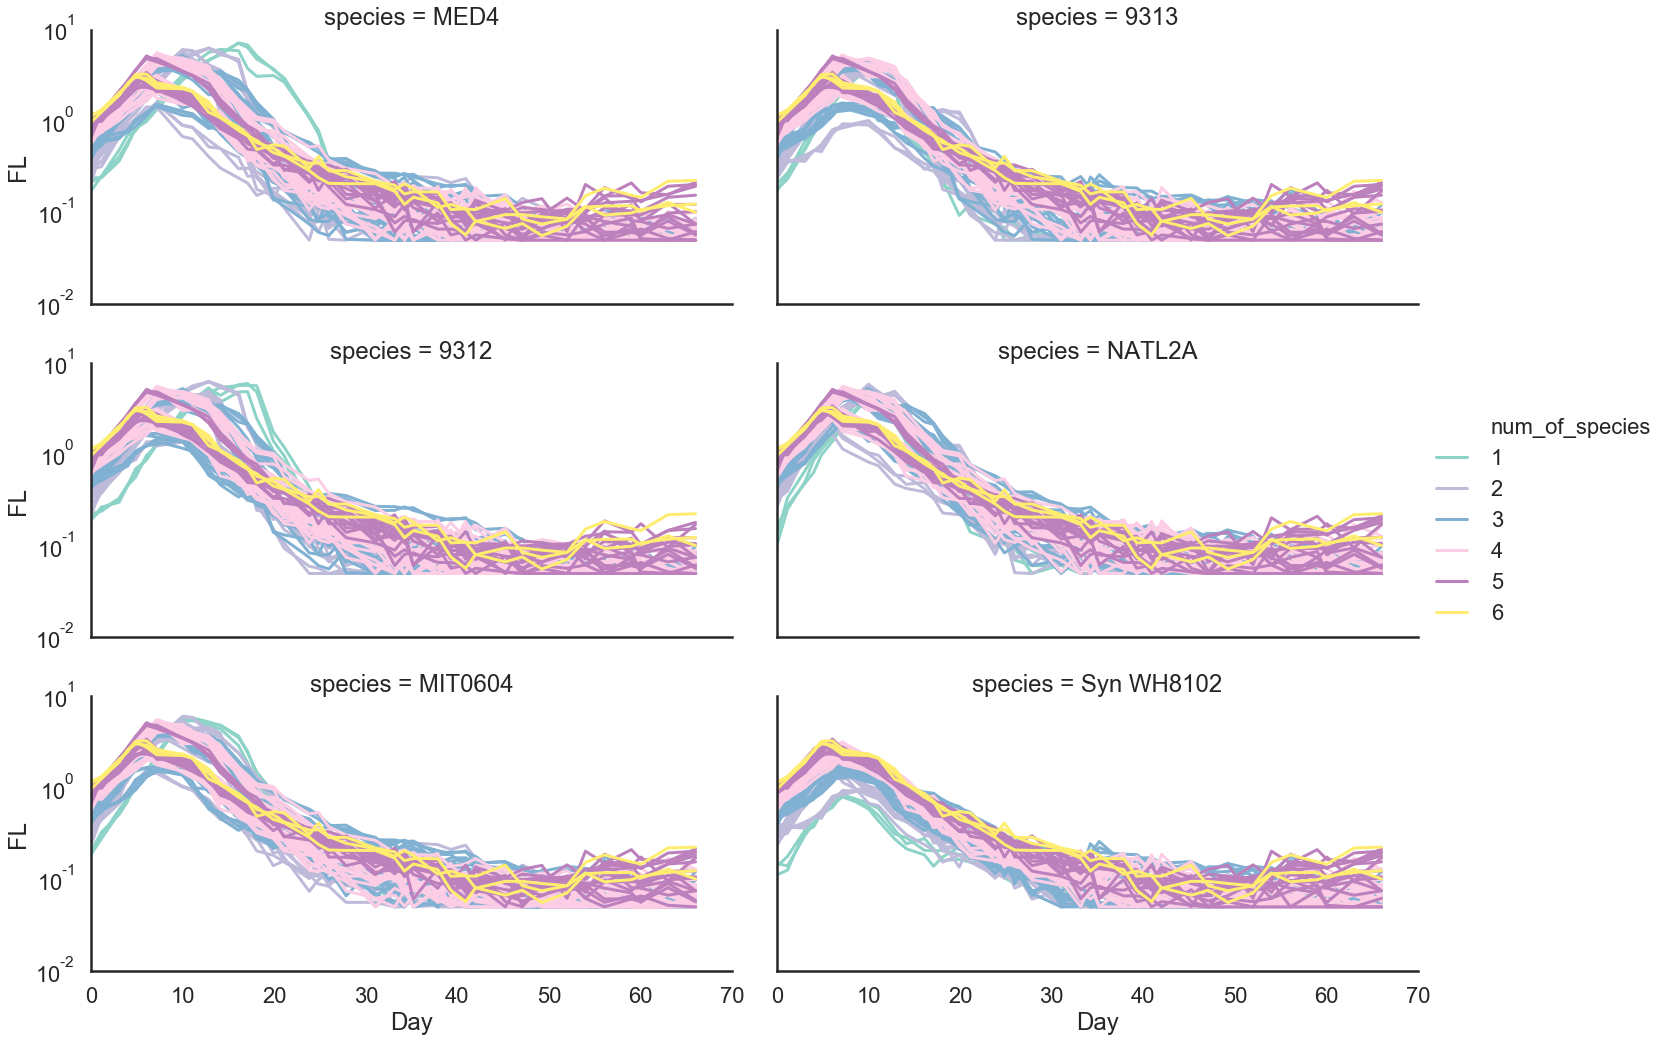

In [114]:
g= sns.relplot(data=exp1_dfm, x='Day', y='FL', kind='line', #ci='sd',
            estimator=None, units='Sample',
            col='sp', col_wrap=2, aspect=2,
                hue='num_of_species',
            palette='Set3', legend='full'
               )
g.set(yscale='log')

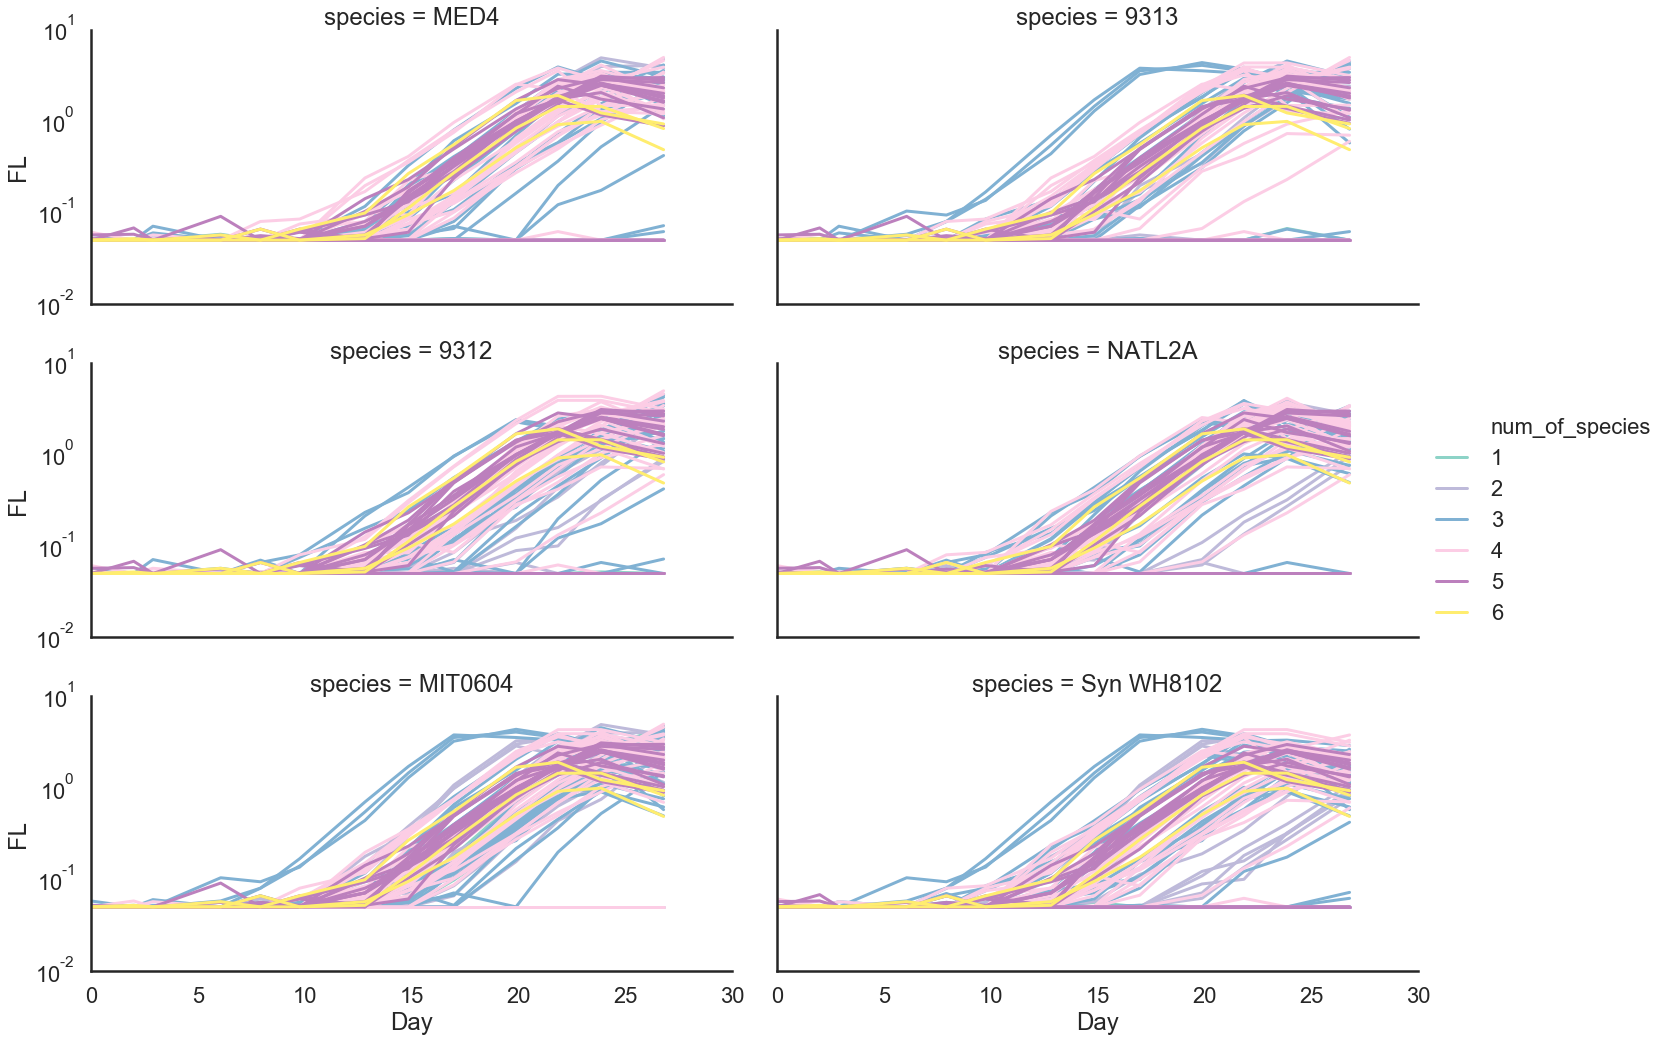

In [115]:
g =sns.relplot(data=exp2_dfm, x='Day', y='FL', kind='line', #ci='sd',
            estimator=None, units='Sample',
            col='sp', col_wrap=2, aspect=2,
                hue='num_of_species',
            palette='Set3', legend='full'
               )
g.set(yscale='log')

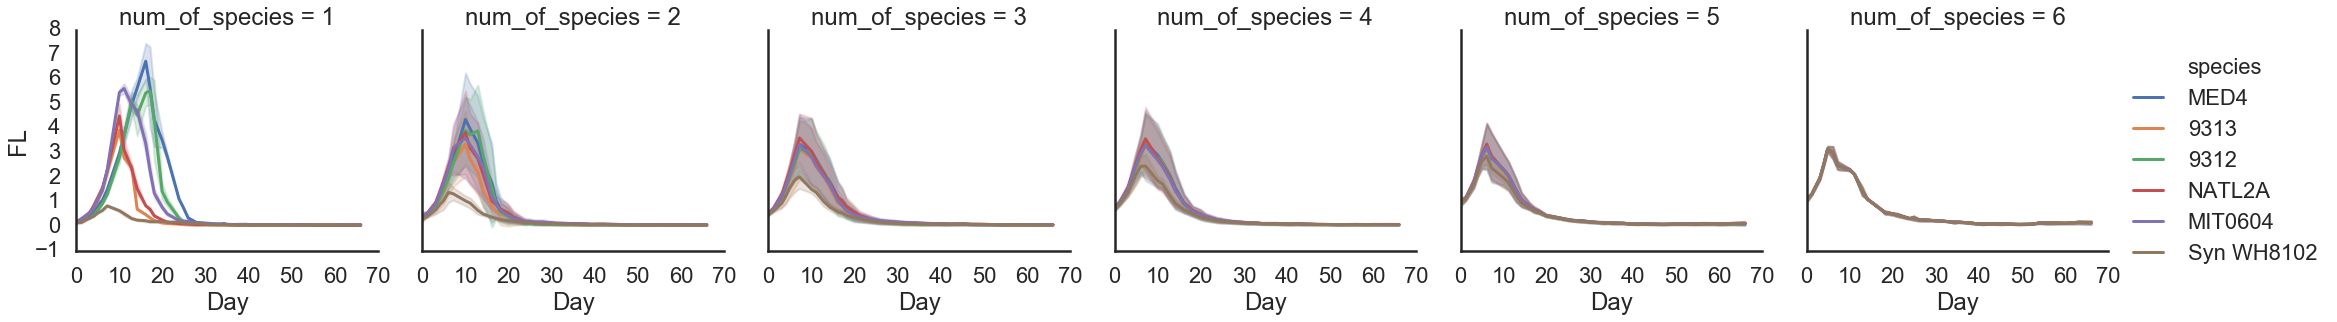

In [116]:
sns.relplot(data=exp1_dfm, x='Day', y='FL', kind='line', ci='sd',
            hue='sp',
                col='num_of_species'
               )

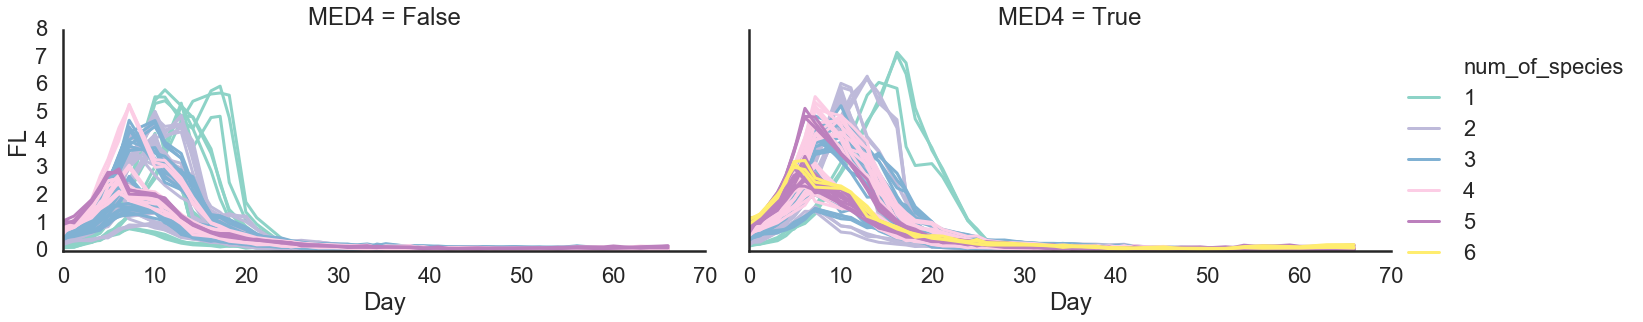

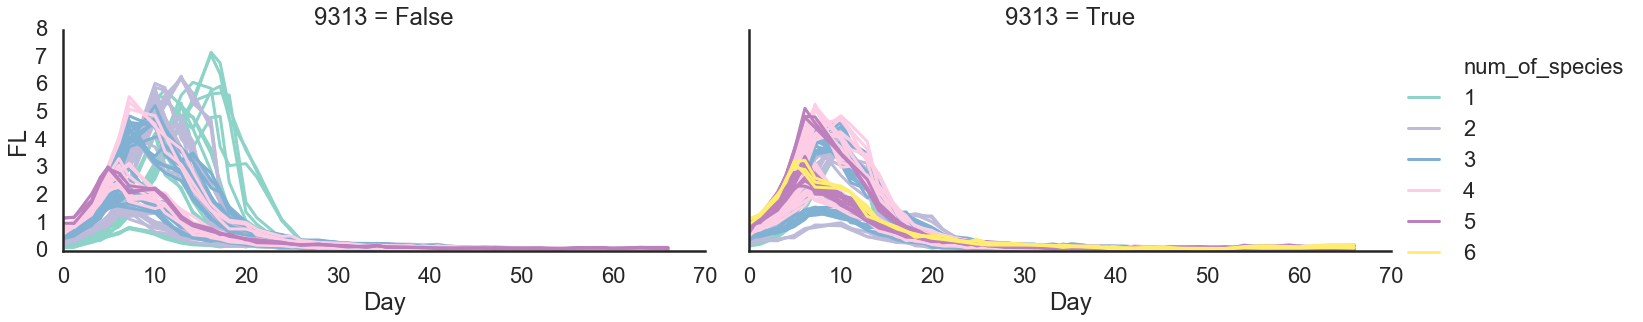

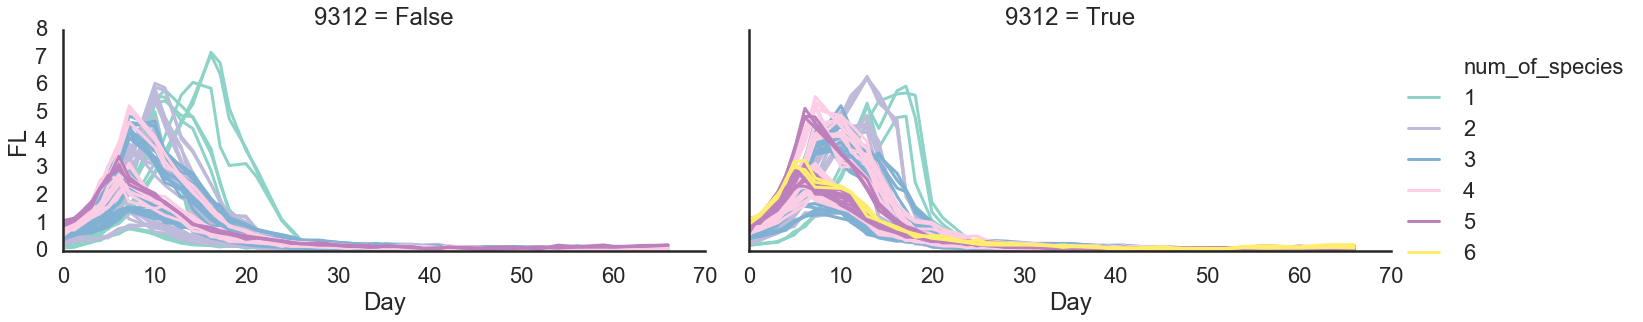

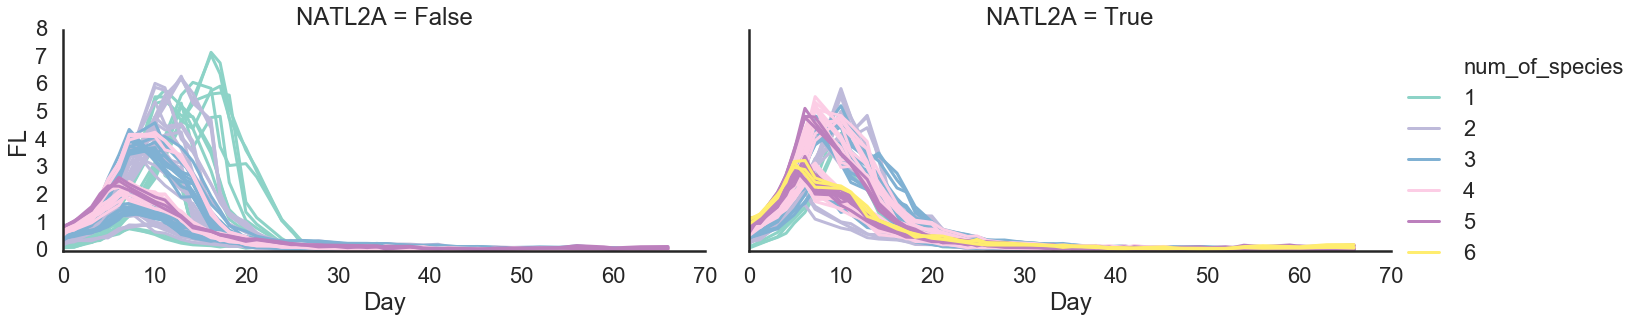

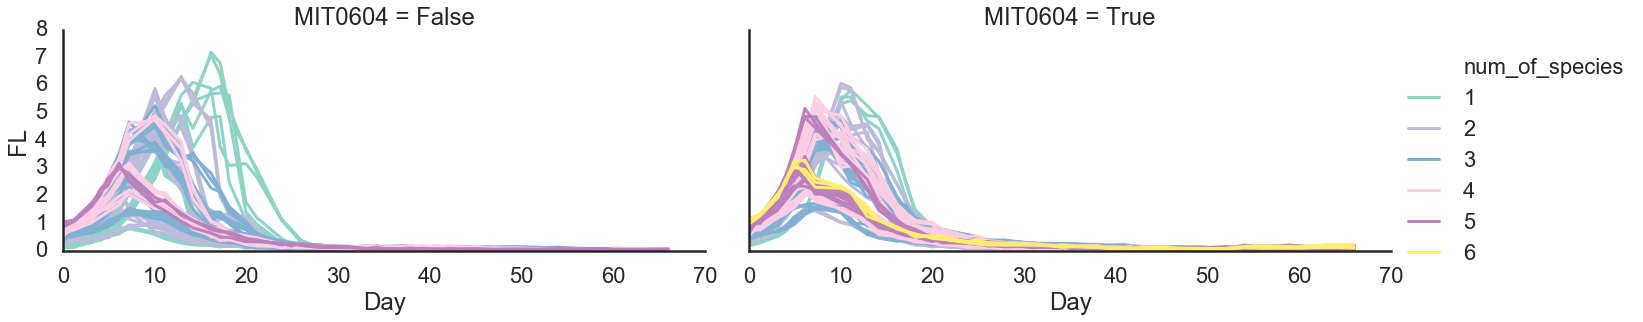

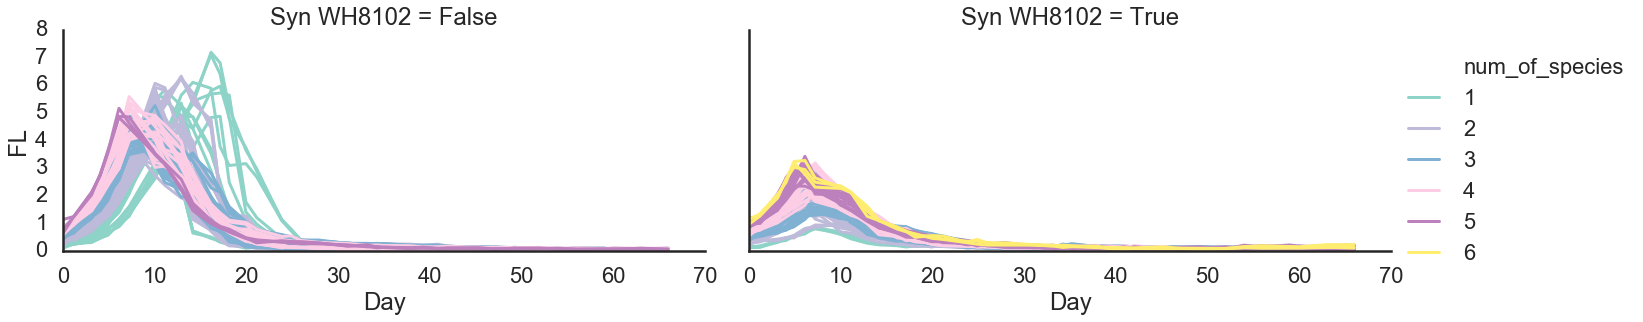

In [120]:
for i in species:
    sns.relplot(data=exp1_df, col=i, x='Day', y='FL', hue='num_of_species',
        kind='line', #ci='sd',
                estimator=None, units='Sample',

                           palette='Set3', legend='full',
                aspect=2, height=5,

               )

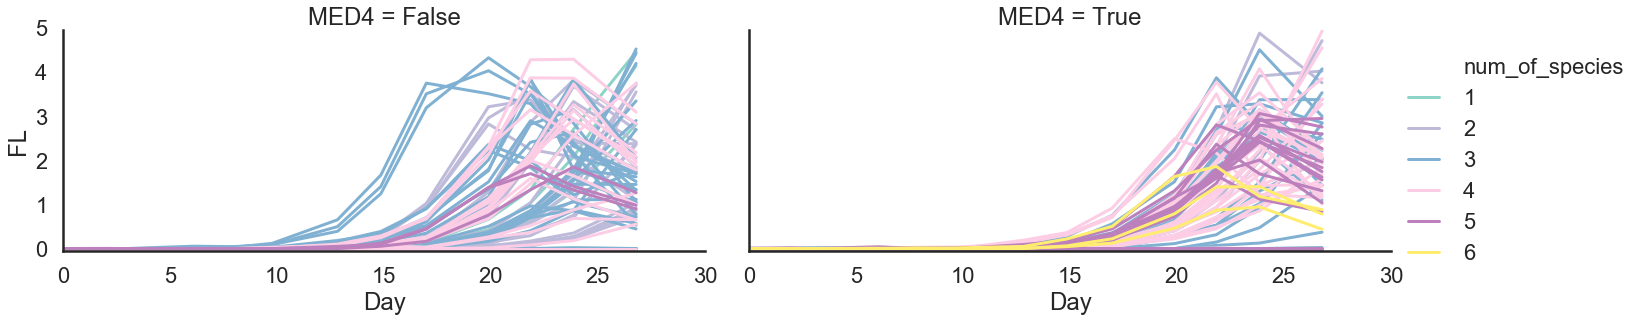

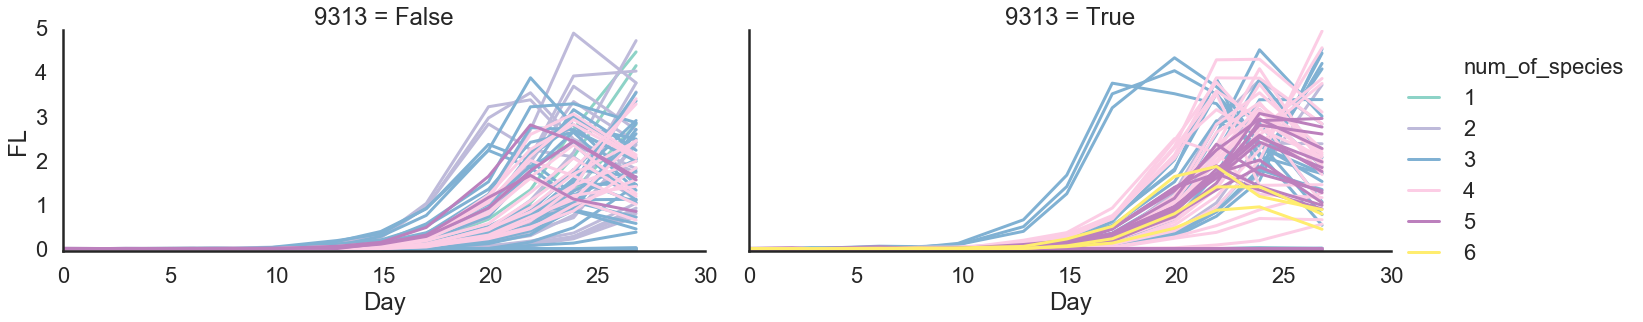

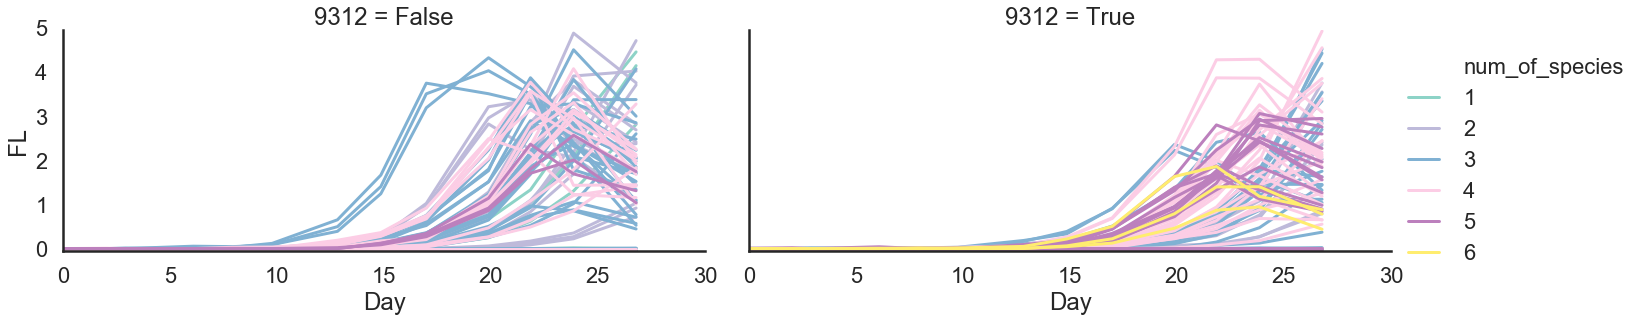

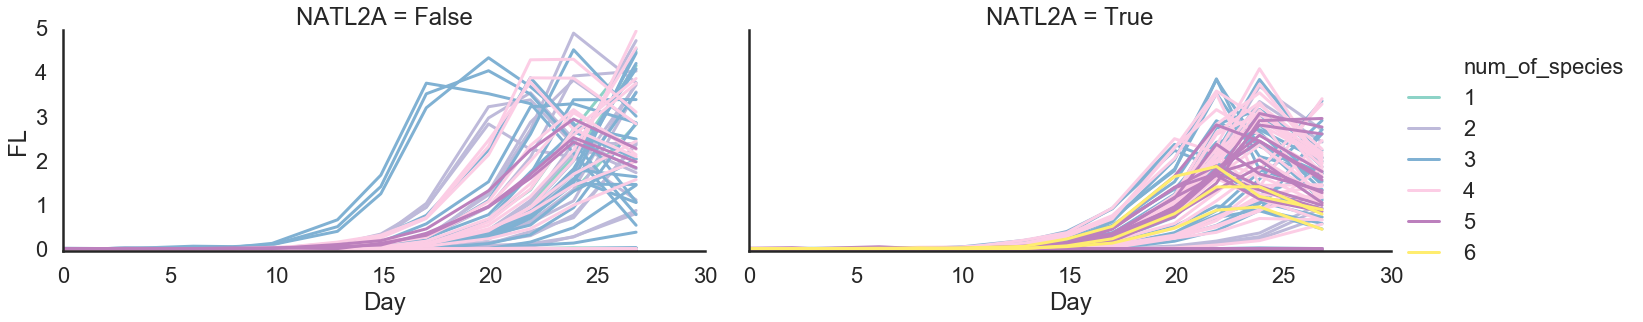

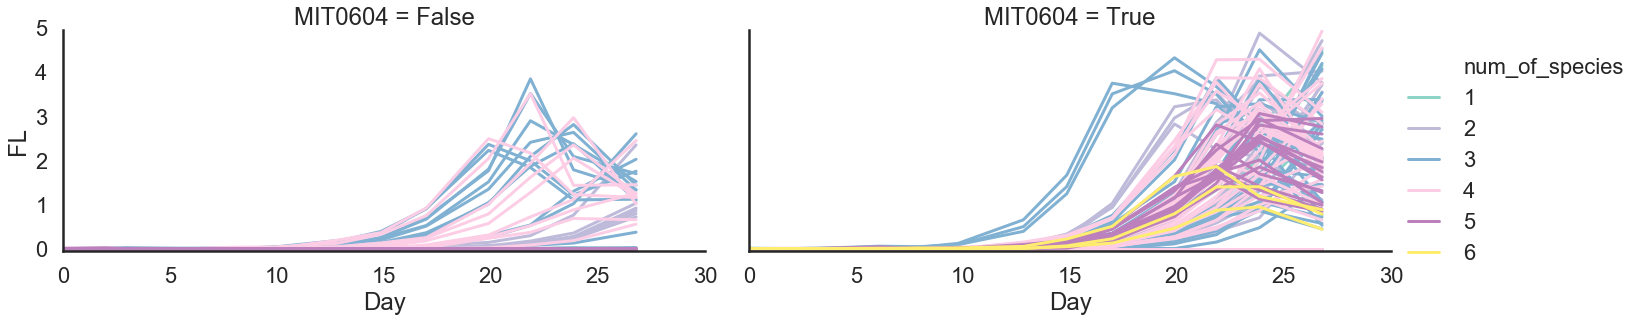

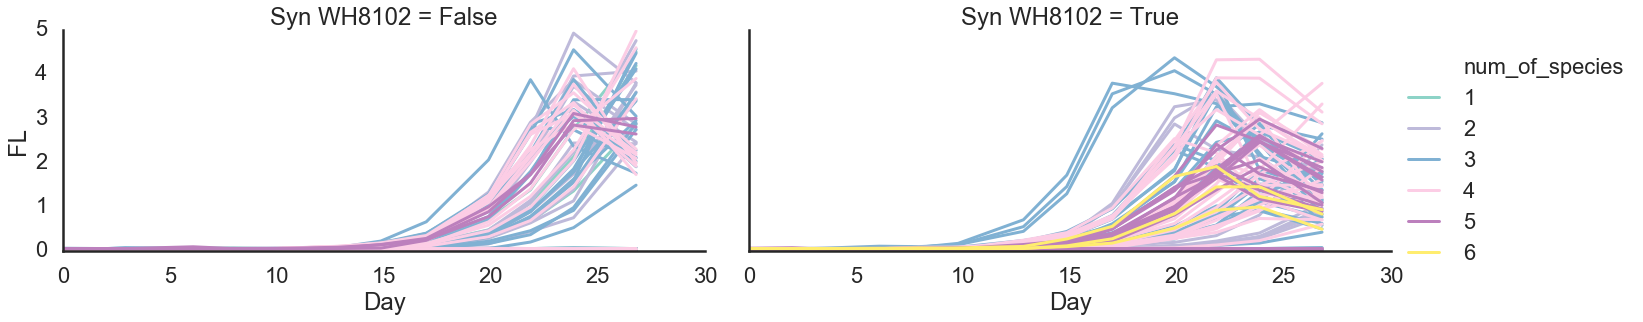

In [119]:
for i in species:
    sns.relplot(data=exp2_df, col=i, x='Day', y='FL', hue='num_of_species',
        kind='line', #ci='sd',
                estimator=None, units='Sample',

                           palette='Set3', legend='full',
                aspect=2, height=5,

               )

In [229]:
df = pd.concat([exp1_df, exp2_df])

In [294]:
df.columns

Index(['Date', 'Day', 'Sample', 'FL', 'sample_prefix', 'experiment', 'MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species',
       'ssp'],
      dtype='object')

In [299]:
pp = df.pivot_table(columns=['experiment'], values=['FL'], index=['Sample', 'sample_prefix', 'MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species',
       'ssp'], aggfunc='max')
pp.columns =  pp.columns.droplevel()
pp['diff'] = pp['e2'] - pp['e1']
pp['precent'] = pp['diff']/pp['e1']

In [300]:
pp.reset_index(inplace=True)


In [303]:
pp.index

RangeIndex(start=0, stop=189, step=1)

In [304]:
pp.sort_values(by='diff')

experiment Sample  sample_prefix   MED4   9313   9312  NATL2A  MIT0604  \
32             1C              1   True  False  False   False    False   
31             1B              1   True  False  False   False    False   
185            8C              8   True  False   True   False    False   
183            8A              8   True  False   True   False    False   
184            8B              8   True  False   True   False    False   
..            ...            ...    ...    ...    ...     ...      ...   
38            21C             21  False  False  False   False     True   
145           54B             54  False   True   True   False     True   
89            37C             37  False   True  False   False     True   
88            37B             37  False   True  False   False     True   
87            37A             37  False   True  False   False     True   

experiment  Syn WH8102  num_of_species                           ssp     e1  \
32               False               1                          MED4  7.180   
31               False               1                          MED4  7.088   
185              False               2                     MED4,9312  6.317   
183              False               2                     MED4,9312  6.256   
184              False               2                     MED4,9312  6.222   
..                 ...             ...                           ...    ...   
38                True               2            MIT0604,Syn WH8102  1.457   
145               True               4  9313,9312,MIT0604,Syn WH8102  2.152   
89                True               3       9313,MIT0604,Syn WH8102  1.583   
88                True               3       9313,MIT0604,Syn WH8102  1.509   
87                True               3       9313,MIT0604,Syn WH8102  1.611   

experiment     e2   diff   precent  
32          0.058 -7.122 -0.991922  
31          0.050 -7.038 -0.992946  
185         0.050 -6.267 -0.992085  
183         0.050 -6.206 -0.992008  
184         0.050 -6.172 -0.991964  
..            ...    ...       ...  
38          3.573  2.116  1.452299  
145         4.331  2.179  1.012546  
89          3.790  2.207  1.394188  
88          4.071  2.562  1.697813  
87          4.364  2.753  1.708876  

[189 rows x 14 columns]

In [122]:
df.columns

Index(['Date', 'Day', 'Sample', 'FL', 'sample_prefix', 'experiment', 'MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species'],
      dtype='object')

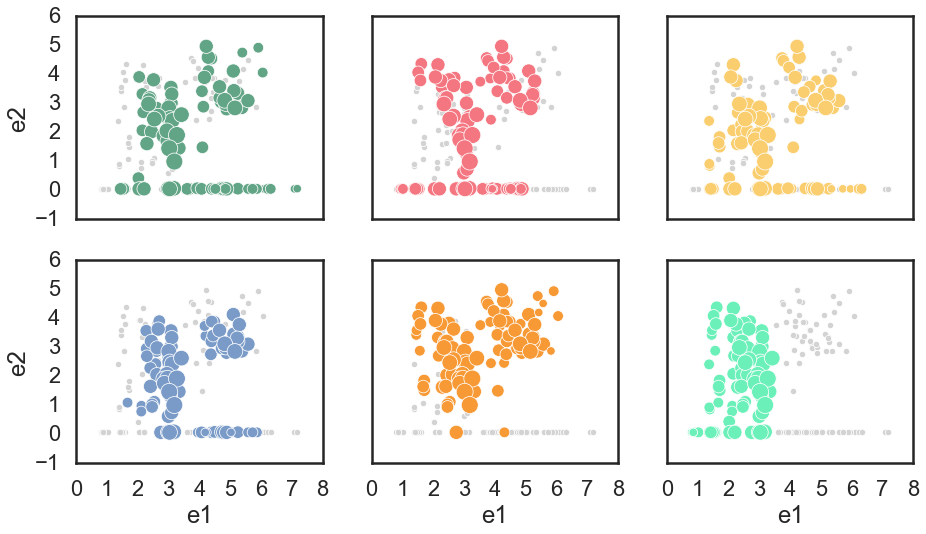

In [430]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
    
for idx,i in enumerate(species):
    sns.scatterplot(data=pp, x='e1', y='e2', s=40, #size='num_of_species', 
                     color=other_color, 
                    ax=axs[idx//3, idx%3])
    sns.scatterplot(data=pp.loc[pp[i]], s=50, 
                x='e1', y='e2', size='num_of_species',  
                    #label=i,
                    color=color_dict[i]
                   , ax=axs[idx//3, idx%3],
                   legend=False
                   )

#plt.legend(loc='best')
#leg = g.get_legend()

In [474]:
pp.head()

experiment Sample  sample_prefix  MED4   9313   9312  NATL2A  MIT0604  \
0             10A             10  True  False  False   False     True   
1             10B             10  True  False  False   False     True   
2             10C             10  True  False  False   False     True   
3             11A             11  True  False  False   False    False   
4             11B             11  True  False  False   False    False   

experiment  Syn WH8102  num_of_species              ssp     e1     e2   diff  \
0                False               2     MED4,MIT0604  5.914  4.921 -0.993   
1                False               2     MED4,MIT0604  6.056  4.063 -1.993   
2                False               2     MED4,MIT0604  5.394  4.752 -0.642   
3                 True               2  MED4,Syn WH8102  1.429  0.052 -1.377   
4                 True               2  MED4,Syn WH8102  1.540  0.050 -1.490   

experiment   precent  
0          -0.167907  
1          -0.329095  
2          -0.119021  
3          -0.963611  
4          -0.967532

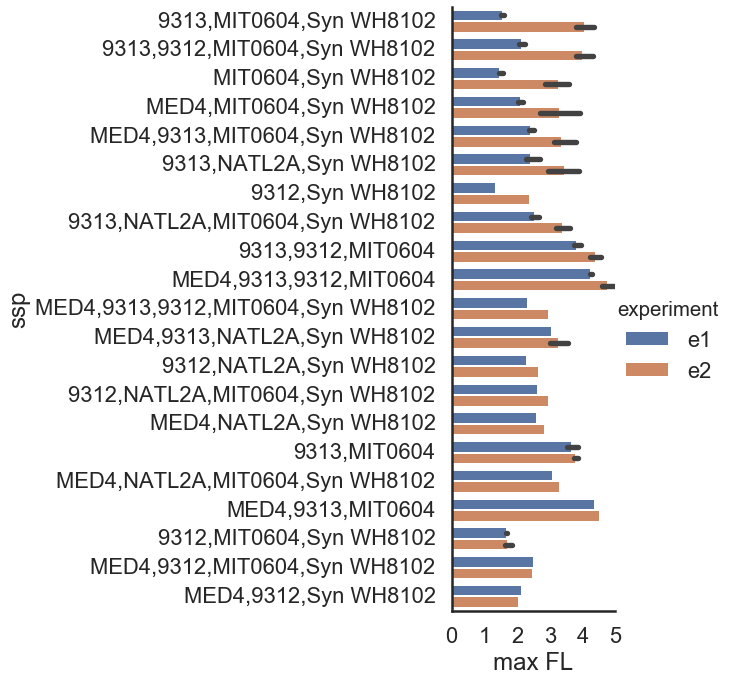

In [510]:
nl_df = data=pp.nlargest(n=40, columns=['diff'])[['ssp', 'e1', 'e2']]
nl_df =pd.melt(nl_df, id_vars='ssp', value_vars=['e1','e2'], var_name='experiment', value_name='max FL')
sns.catplot(data=nl_df, y='ssp', hue='experiment', x='max FL', kind='bar', aspect=1, height=10)


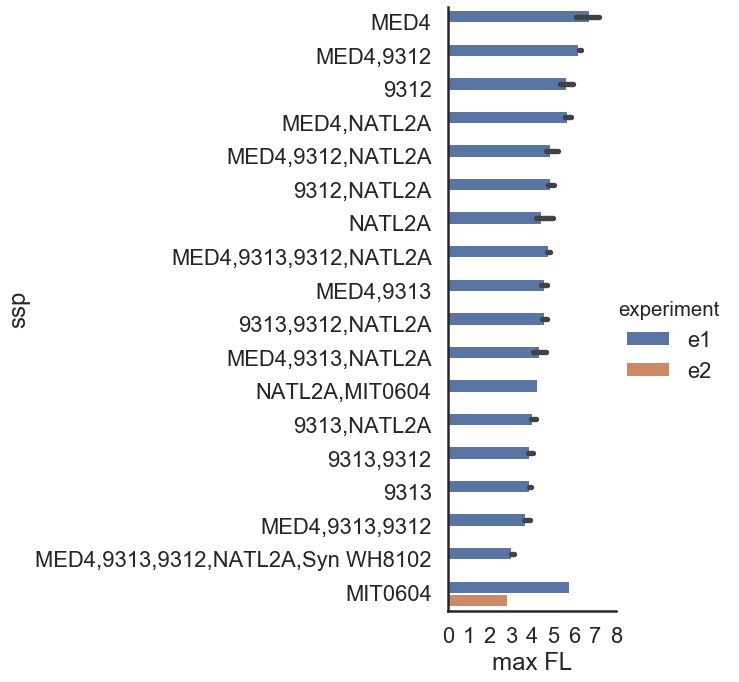

In [508]:
nl_df = data=pp.nsmallest(n=50, columns=['diff'])[['ssp', 'e1', 'e2']]
nl_df =pd.melt(nl_df, id_vars='ssp', value_vars=['e1','e2'], var_name='experiment', value_name='max FL')
sns.catplot(data=nl_df, y='ssp', hue='experiment', x='max FL', kind='bar', aspect=1, height=10)


In [505]:
nl_df.groupby('experiment').describe()

max FL                                                        
            count      mean       std    min    25%     50%    75%    max
experiment                                                               
e1           60.0  4.570617  1.100386  2.183  3.925  4.5815  5.272  7.180
e2           60.0  0.303567  0.744413  0.050  0.050  0.0500  0.059  3.094

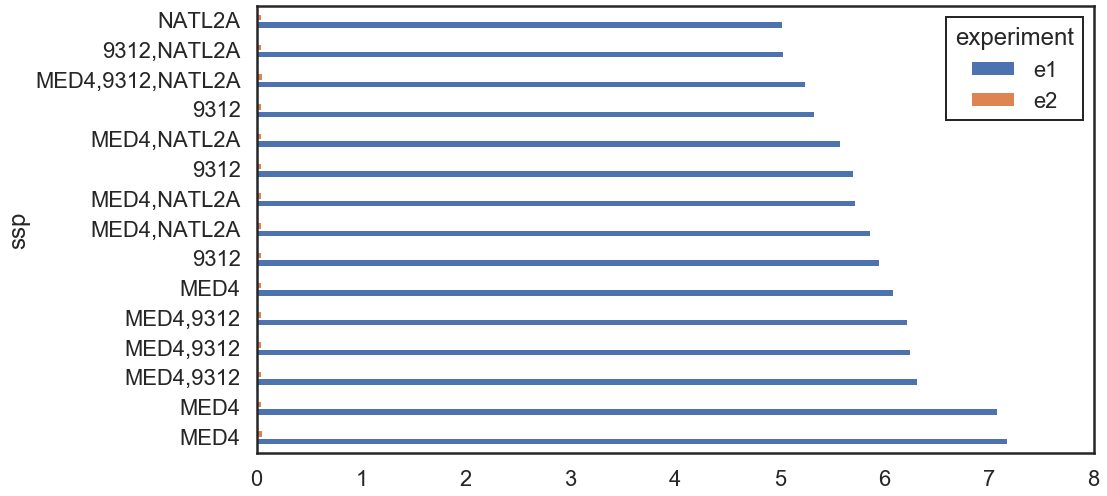

In [489]:
nl_df = data=pp.nsmallest(n=15, columns=['diff'])[['ssp', 'e1', 'e2']]
nl_df.index= nl_df.ssp
nl_df.plot(kind='barh')
            #kind='bar', y='ssp', x=['e1', 'e2'])

In [453]:
ppm.columns

Index(['FL'], dtype='object')

In [458]:
ppm.reset_index(inplace=True)
ppm.rename(columns={'FL': 'max FL'}, inplace=True)

In [469]:
ppmm = pd.melt(ppm, id_vars=['Sample', 'sample_prefix', 'num_of_species', 'ssp', 'experiment',
       'max FL'] ,var_name='sp', value_vars=['MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102',] )
ppmm = ppmm.loc[ppmm['value']]              
              


In [467]:
ppmm.columns

Index(['Sample', 'sample_prefix', 'num_of_species', 'ssp', 'experiment',
       'max FL', 'sp', 'value'],
      dtype='object')

In [468]:
ppmm.head()

Sample  sample_prefix  num_of_species           ssp experiment  max FL  \
0    10A             10               2  MED4,MIT0604         e1   5.914   
1    10A             10               2  MED4,MIT0604         e2   4.921   
2    10B             10               2  MED4,MIT0604         e1   6.056   
3    10B             10               2  MED4,MIT0604         e2   4.063   
4    10C             10               2  MED4,MIT0604         e1   5.394   

     sp  value  
0  MED4   True  
1  MED4   True  
2  MED4   True  
3  MED4   True  
4  MED4   True

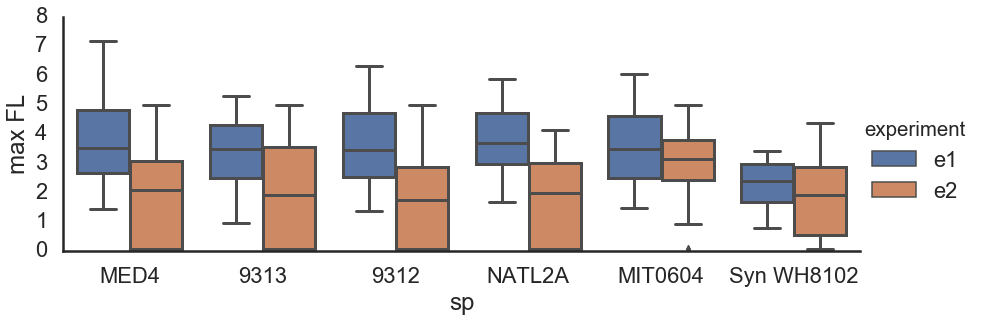

In [473]:
sns.catplot(data=ppmm, x='sp', y='max FL', kind='box', hue='experiment', aspect=2.5)

In [442]:
ppm.columns

Index(['experiment', 'max FL'], dtype='object')

In [131]:
species

['MED4', '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102']

In [139]:
from itertools import combinations
len(list(combinations(species, 5)))

6

In [264]:
from itertools import combinations_with_replacement
len(list(combinations_with_replacement(['NATL2A', 'MIT0604', 'Syn WH8102'], 3)))

10

# cluster exp2

In [418]:
sample_col = 'Sample'
X = cp.experiments2X(exp2_df, value_col='FL', sample_col='Sample', x_col='Day', cumsummode=False)
metadf = cp.get_meta(exp2_df, meta_col=['Sample', 'sample_prefix', 'MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species',
       'ssp'])
dfpca = cp.run_tsne(X=X, metadf=metadf, sample_col=sample_col)

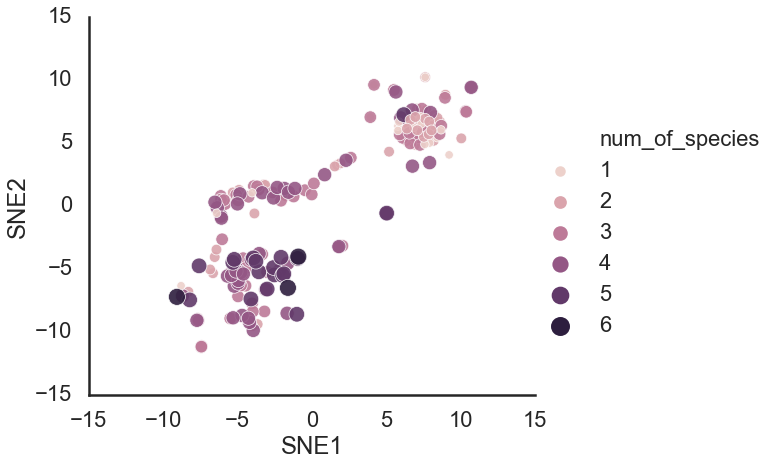

In [419]:
sns.relplot(data=dfpca, x='SNE1', y='SNE2', hue='num_of_species', 
            size='num_of_species',
            s=50, alpha=0.9, height=7, aspect=1.2,
            legend='full'
           )

In [420]:
dfpca.columns

Index(['SNE1', 'SNE2', 'Sample', 'sample_prefix', 'MED4', '9313', '9312',
       'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species', 'ssp', 'FL'],
      dtype='object')

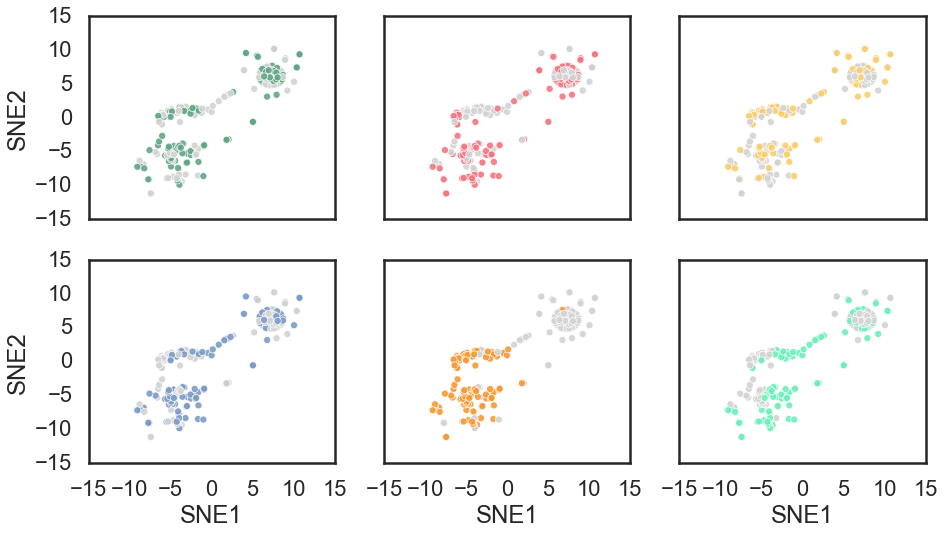

In [421]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
for idx,i in enumerate(species):
    sns.scatterplot(data=dfpca, x='SNE1', y='SNE2', hue=i, 
            #size='num_of_species',
            s=50, alpha=0.9, #height=5, aspect=1.2,
            legend=None, 
                    palette=[other_color, color_dict[i]],
                ax=axs[idx//3, idx%3],
                
           )

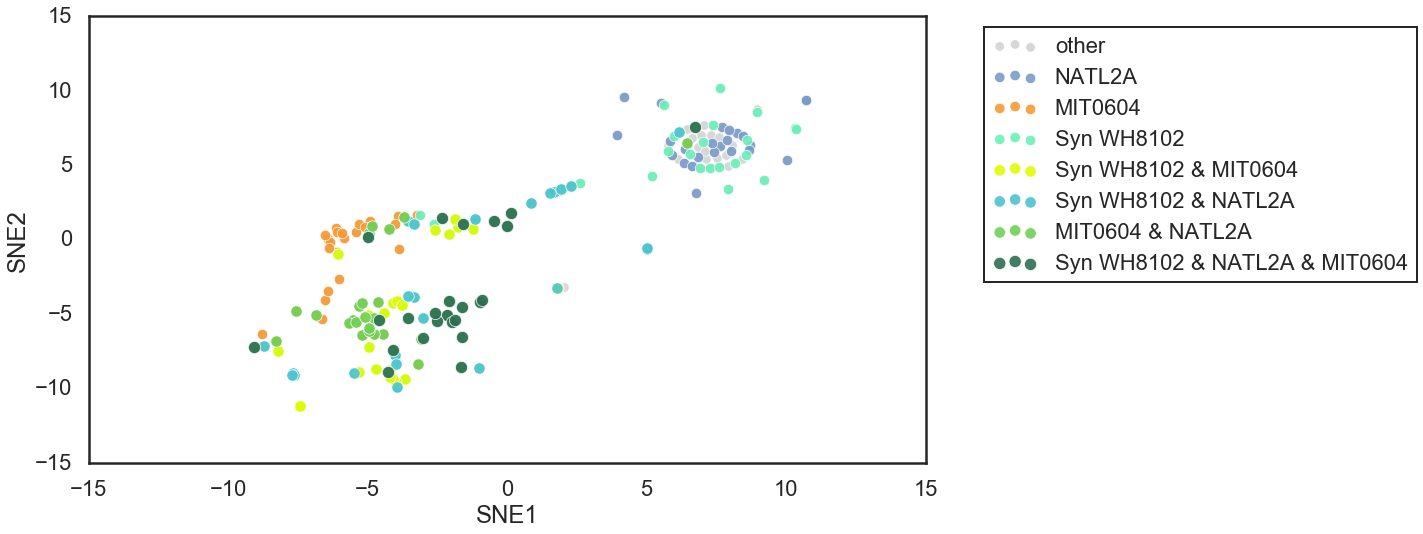

In [422]:
sns.scatterplot(data=dfpca, x='SNE1', y='SNE2', 
            s=90, alpha=0.9, #height=5, aspect=1.2,
            color=other_color, label='other')
sns.scatterplot(data=dfpca[dfpca['NATL2A']], 
                x='SNE1', y='SNE2', 
            s=110, alpha=0.9, #height=5, aspect=1.2,
            color=Natl2A_color, label='NATL2A')
sns.scatterplot(data=dfpca[dfpca['MIT0604']], 
                x='SNE1', y='SNE2', 
            s=110, alpha=0.9, #height=5, aspect=1.2,
            color=MIT0604_color, label='MIT0604')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102']], 
                x='SNE1', y='SNE2', 
            s=110, alpha=0.9, #height=5, aspect=1.2,
            color=SYN_color, label='Syn WH8102')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102'] & dfpca['MIT0604']], 
                x='SNE1', y='SNE2', 
            s=130, alpha=0.9, #height=5, aspect=1.2,
            color=syn_0606_color, label='Syn WH8102 & MIT0604')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102'] & dfpca['NATL2A']], 
                x='SNE1', y='SNE2', 
            s=130, alpha=0.9, #height=5, aspect=1.2,
            color=syn_natl_color, label='Syn WH8102 & NATL2A')
sns.scatterplot(data=dfpca[dfpca['MIT0604'] & dfpca['NATL2A']], 
                x='SNE1', y='SNE2', 
            s=130, alpha=0.9, #height=5, aspect=1.2,
            color=natl_0604_color, label='MIT0604 & NATL2A')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102'] & dfpca['NATL2A'] & dfpca['MIT0604']], 
                x='SNE1', y='SNE2', 
            s=150, alpha=0.9, #height=5, aspect=1.2,
            color=syn_natl_0604_color, label='Syn WH8102 & NATL2A & MIT0604')

plt.legend(bbox_to_anchor=(1.6, 1))

# cluster exp1

In [412]:
sample_col = 'Sample'
X = cp.experiments2X(exp1_df, value_col='FL', sample_col='Sample', x_col='Day', cumsummode=False)
metadf = cp.get_meta(exp1_df, meta_col=['Sample', 'sample_prefix', 'MED4',
       '9313', '9312', 'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species',
       'ssp'])
dfpca = cp.run_tsne(X=X, metadf=metadf, sample_col=sample_col)

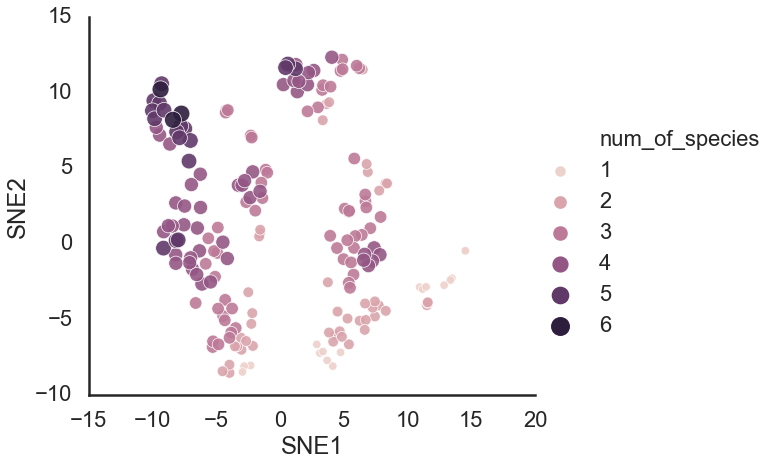

In [414]:
sns.relplot(data=dfpca, x='SNE1', y='SNE2', hue='num_of_species', 
            size='num_of_species',
            s=50, alpha=0.9, height=7, aspect=1.2,
            legend='full'
           )

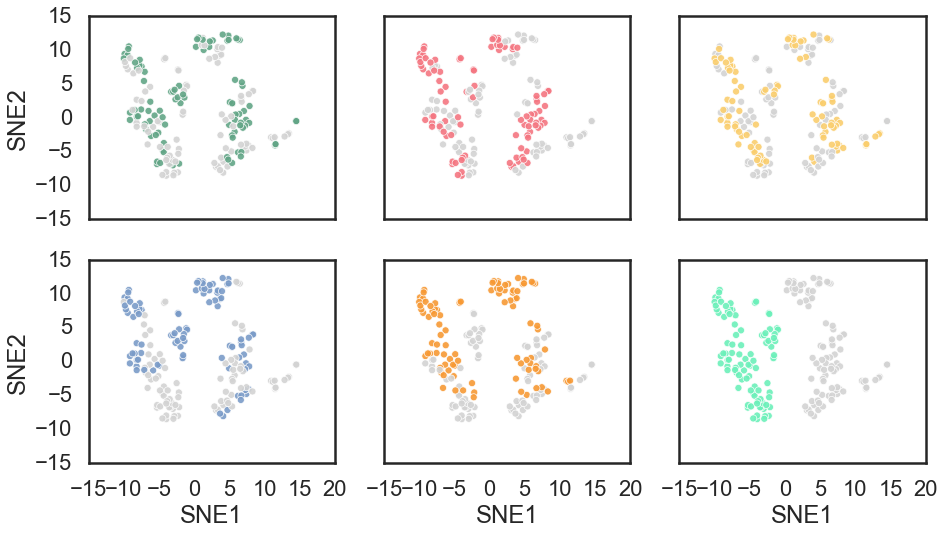

In [415]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
for idx,i in enumerate(species):
    sns.scatterplot(data=dfpca, x='SNE1', y='SNE2', hue=i, 
            #size='num_of_species',
            s=50, alpha=0.9, #height=5, aspect=1.2,
            legend=None, 
                    palette=[other_color, color_dict[i]],
                ax=axs[idx//3, idx%3],
                
           )

In [398]:
dfpca.columns


Index(['SNE1', 'SNE2', 'Sample', 'sample_prefix', 'MED4', '9313', '9312',
       'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species', 'ssp', 'FL'],
      dtype='object')

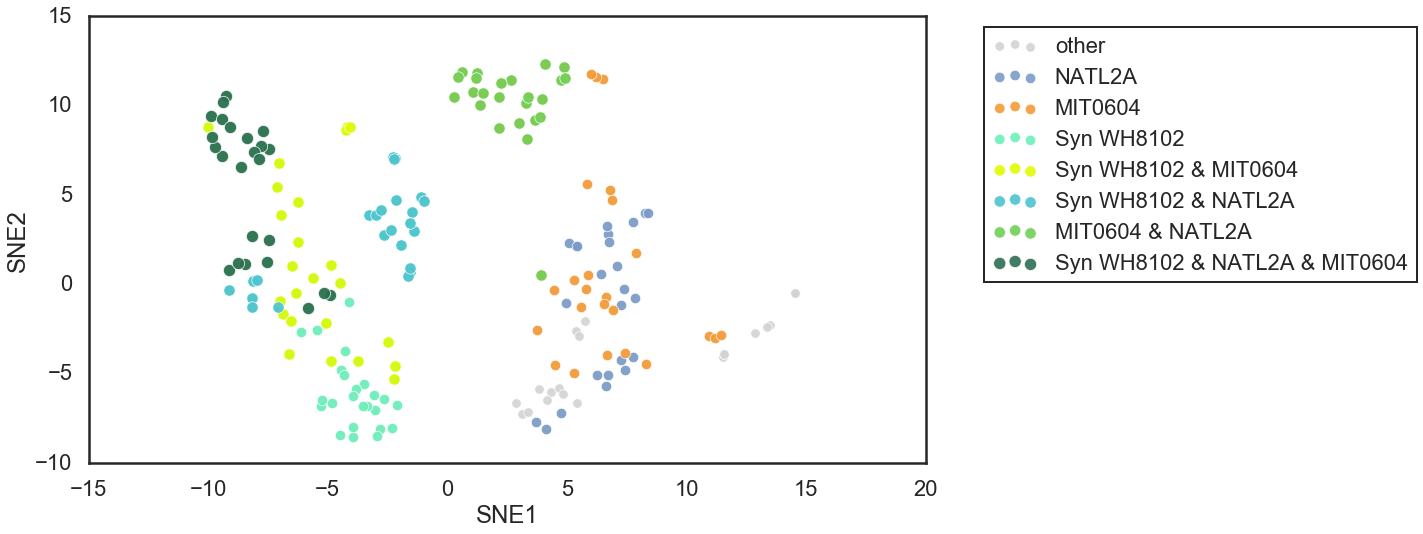

In [417]:
sns.scatterplot(data=dfpca, x='SNE1', y='SNE2', 
            s=90, alpha=0.9, #height=5, aspect=1.2,
            color=other_color, label='other')
sns.scatterplot(data=dfpca[dfpca['NATL2A']], 
                x='SNE1', y='SNE2', 
            s=110, alpha=0.9, #height=5, aspect=1.2,
            color=Natl2A_color, label='NATL2A')
sns.scatterplot(data=dfpca[dfpca['MIT0604']], 
                x='SNE1', y='SNE2', 
            s=110, alpha=0.9, #height=5, aspect=1.2,
            color=MIT0604_color, label='MIT0604')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102']], 
                x='SNE1', y='SNE2', 
            s=110, alpha=0.9, #height=5, aspect=1.2,
            color=SYN_color, label='Syn WH8102')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102'] & dfpca['MIT0604']], 
                x='SNE1', y='SNE2', 
            s=130, alpha=0.9, #height=5, aspect=1.2,
            color=syn_0606_color, label='Syn WH8102 & MIT0604')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102'] & dfpca['NATL2A']], 
                x='SNE1', y='SNE2', 
            s=130, alpha=0.9, #height=5, aspect=1.2,
            color=syn_natl_color, label='Syn WH8102 & NATL2A')
sns.scatterplot(data=dfpca[dfpca['MIT0604'] & dfpca['NATL2A']], 
                x='SNE1', y='SNE2', 
            s=130, alpha=0.9, #height=5, aspect=1.2,
            color=natl_0604_color, label='MIT0604 & NATL2A')
sns.scatterplot(data=dfpca[dfpca['Syn WH8102'] & dfpca['NATL2A'] & dfpca['MIT0604']], 
                x='SNE1', y='SNE2', 
            s=150, alpha=0.9, #height=5, aspect=1.2,
            color=syn_natl_0604_color, label='Syn WH8102 & NATL2A & MIT0604')

plt.legend(bbox_to_anchor=(1.6, 1))

In [286]:
dfpca.columns

Index(['SNE1', 'SNE2', 'Sample', 'sample_prefix', 'MED4', '9313', '9312',
       'NATL2A', 'MIT0604', 'Syn WH8102', 'num_of_species', 'ssp', 'FL'],
      dtype='object')